## DSCI 303 – Project 01
### Samuel Tamakloe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### Part 1: Importing and Viewing the Data

In [2]:
df = pd.read_table(filepath_or_buffer='auto_data.txt', sep='\t')
weight = list(df.wt)
mpg = list(df.mpg)
ln_mpg = list(df.ln_mpg)

The code above uses the Pandas library to import the dataset from the 'auto_data.txt' file. It creates three lists named 'weight', 'mpg', and 'ln_mpg', containing the corresponding information for each of the 398 vehicle models.

To confirm that each list contains 398 values, we print the lengths of the 'weight', 'mpg', and 'ln_mpg' lists using the len() function.

Now, let's view the information for the first 10 vehicles in the dataset:

In [3]:
print("weight: ",len(weight))
print("mpg:\t",len(mpg))
print("ln_mpg: ",len(ln_mpg))

weight:  398
mpg:	 398
ln_mpg:  398


The code above uses a loop to print the first 10 values of each list: 'weight', 'mpg', and 'ln_mpg'. The output is formatted with columns aligned to the right and specific column widths as mentioned.
The output will include column headers ("weight", "mpg", "ln_mpg") and a dividing line ("-----------------------------"). The 'mpg' values will be displayed with 1 decimal digit, and the 'ln_mpg' values will be displayed with 4 decimal digits.

In [4]:
# print('weight\t mpg\t ln_mpg')
# print("-" * 22)
# for i in range(2):
#     print(weight[i], '\t', mpg[i], '\t', ln_mpg[i])

print(f"{'Weight':>6} {'MPG':>8} {'LN_MPG':>10}")
print("-" * 22)
for i in range(10):
    print(f"{weight[i]:>6} {mpg[i]:>8.1f} {ln_mpg[i]:>10.4f}")

Weight      MPG     LN_MPG
----------------------
  3190     27.2     3.3032
  1985     32.8     3.4904
  3410     18.1     2.8959
  4080     17.5     2.8622
  3530     25.4     3.2347
  1773     31.0     3.4340
  2670     27.4     3.3105
  1755     39.1     3.6661
  2188     34.3     3.5351
  2155     30.0     3.4012


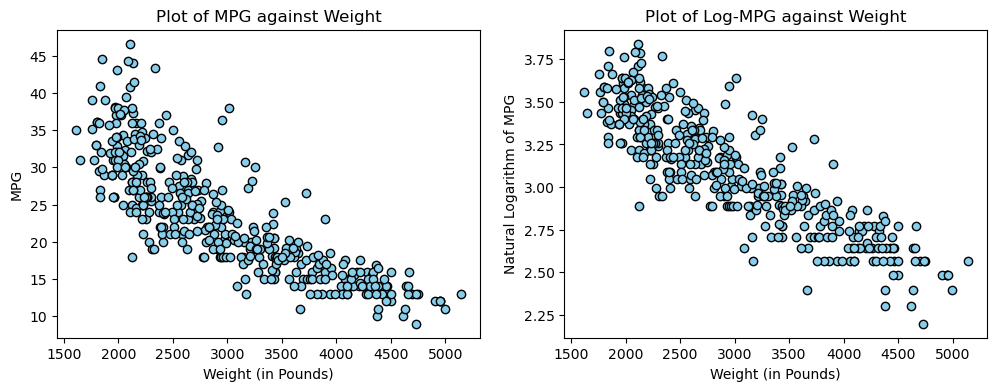

In [5]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(weight, mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('MPG')
plt.title('Plot of MPG against Weight')
plt.subplot(1,2,2)
plt.scatter(weight, ln_mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Plot of Log-MPG against Weight')
plt.show()

### Observations:

* The scatter plot of MPG against weight shows a slight bend or curve in the relationship.
* The scatter plot of log-MPG against weight appears to have a mostly linear relationship.
* Since we will be constructing a linear model, we will use log-MPG as the response variable in our model.







### Part 2: Splitting the Data

### We will now create scatter plots to visualizer data in training and test sets

In [6]:
x_train = weight[0:300]   # 0 to 299 rows
x_test = weight[300:]     
y_train = ln_mpg[0:300]  
y_test = ln_mpg[300:] 
mpg_train = mpg[0:300]
mpg_test = mpg[300:] 

In [7]:
n_train = len(x_train)
n_test = len(x_test)

In [8]:
print("Training set size: ", n_train)
print("Testing set size: ", n_test)

Training set size:  300
Testing set size:  98


The code above uses slicing to split the original lists 'weight', 'ln_mpg', and 'mpg' into training and test sets. The first 300 values are used for the training set, and the last 98 values are used for the test set.

Variables 'x_train', 'x_test', 'y_train', 'y_test', 'mpg_train', and 'mpg_test' are created to store the corresponding split lists.

The lengths of 'x_train' and 'x_test' are assigned to 'n_train' and 'n_test' variables, respectively. Then, the sizes of the training and test sets are displayed using the 'print()' function.

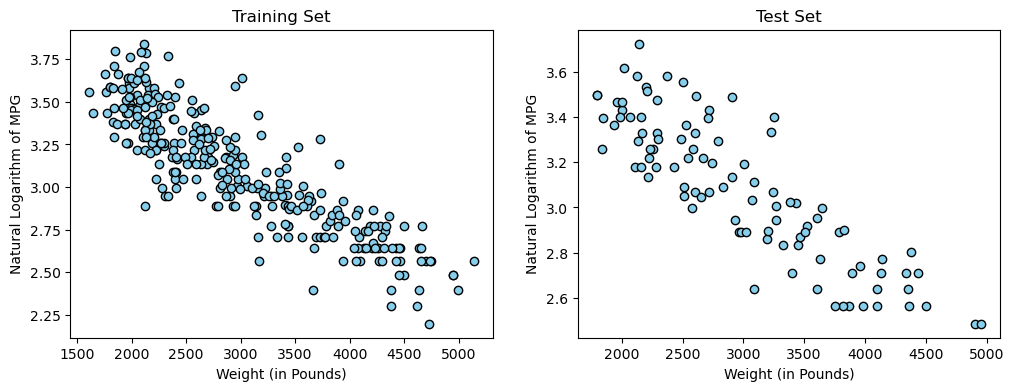

In [9]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

### Part 3: Descriptive Statistics

The code above calculates the mean of the values in 'x_train' and 'y_train' using the formula provided. The 'sum()' function is used to calculate the sum of the values, and then it is divided by the number of elements in the training set, which is stored in the 'n_train' variable.

The mean values are stored in the variables 'mean_x' and 'mean_y'.

The mean values are displayed using the 'print()' function, rounding the displayed values to the specified number of decimal places using the 'round()' function.

In [10]:
mean_x = sum(x_train) / n_train
mean_y = sum(y_train) / n_train

In [11]:
print("Mean of X = ", (round(mean_x, 2)))
print("Mean of y = ", (round(mean_y, 4)))

Mean of X =  2968.62
Mean of y =  3.1069


We will now calculate the sum for X and Y, denoted as SXX and SYY, respectively. The SSD measures the spread or dispersion of the observations around the mean values. It is calculated by summing the squared differences between each observation and the mean. 

In [12]:
Sxx = sum([(xi - mean_x) ** 2 for xi in x_train])
Syy = sum([(yi - mean_y) ** 2 for yi in y_train])

In [13]:
print("Sxx = ", (round(Sxx, 2)))
print("Syy = ", (round(Syy, 4)))

Sxx =  224006920.44
Syy =  36.0746


The code above uses list comprehension to calculate the sum of squared deviations for X and Y. The difference between each observation and the corresponding mean value is squared, and the results are summed using the 'sum()' function.

The sum of squared deviations for X is stored in the variable 'sxx', and the sum of squared deviations for Y is stored in the variable 'syy'.

In [14]:
var_x = Sxx / (n_train - 1)
var_y = Syy / (n_train - 1)



The code above uses the provided formulas to calculate the variances of X and Y. The sum of squared deviations is divided by the degrees of freedom, which is the number of observations minus one.

The variance of X is stored in the variable 'var_x', and the variance of Y is stored in the variable 'var_y'.

In [15]:
print("Variance of X = ", round(var_x, 2))
print("Variance of Y = ", round(var_y, 4))

Variance of X =  749187.02
Variance of Y =  0.1207


## Part 4: Linear Regression Model

In this part, we will calculate 𝑆𝑋𝑌, which we will then use to find the coefficients for our linear regression model

In [16]:
Sxy = 0
for i in range(len(x_train)):
    Sxy += (x_train[i] - mean_x) * (y_train[i] - mean_y)

# print("Sxy =", round(Sxy, 2))
#Sxy = sum((x - mean_x) * (y - mean_y) for x, y in zip(x_train, y_train))

#Display Sxy
print("Sxy =", round(Sxy, 2))


Sxy = -78999.13


The code above calculates 𝑆𝑋𝑌 using a loop that iterates over the values of 𝑥𝑖 and 𝑦𝑖 in the training set. It calculates the sum of the products of the deviations of 𝑥 and 𝑦 from their means.
The result is stored in the variable 'Sxy'.

In [17]:
beta_1 = Sxy / Sxx
beta_0 = mean_y - beta_1 * mean_x

The code above uses the provided formulas to calculate the model coefficients 𝛽 ̂
* 0 and 𝛽 ̂
* 1 is calculated by dividing 𝑆𝑋𝑌 by 𝑆𝑋𝑋, and 𝛽 ̂
* 0 is calculated by subtracting 𝛽 ̂
* 1 times 𝑥̅ from 𝑦̅.
    * The values of 𝛽 ̂
    * 0 and 𝛽 ̂
    * 1 are stored in the variables 'beta_0' and 'beta_1', respectively.

In [18]:
# Displaying beta_0 and beta_1
print("beta_0 =", round(beta_0, 4))
print("beta_1 =", round(beta_1, 8))

beta_0 = 4.1538
beta_1 = -0.00035266


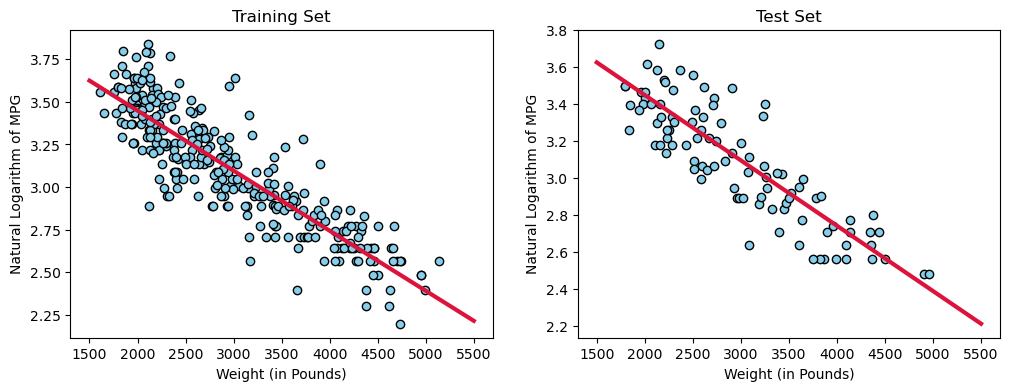

In [19]:
y_vals = [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5500]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Test Set')
plt.show()

## Part 5: Training Score

To calculate the estimated response values for the training set, we can use the variables beta_0, beta_1, and the list x_train. We will store the results in a list named pred_y_train

In [20]:
pred_y_train = [beta_0 + beta_1 * x for x in x_train]

calculate the residuals for the training set, we can use the values stored in y_train and pred_y_train. We will store the results in a list named error_y_train

In [21]:
error_y_train = [y_train[i] - pred_y_train[i] for i in range(len(y_train))]

Let's display the true 𝑌 values, the predicted 𝑌 values, and the residuals for the first 10 observations in the training set.

In [22]:
# Print the first 10 values of y_train, pred_y_train, and error_y_train
print("True y     Pred y     Error")
print("-" * 30)
for i in range(10):
    print(f"{y_train[i]:6.4f}{pred_y_train[i]:10.4f} {error_y_train[i]:10.4f}")

True y     Pred y     Error
------------------------------
3.3032    3.0289     0.2743
3.4904    3.4538     0.0366
2.8959    2.9513    -0.0554
2.8622    2.7150     0.1472
3.2347    2.9089     0.3258
3.4340    3.5286    -0.0946
3.3105    3.2122     0.0983
3.6661    3.5349     0.1312
3.5351    3.3822     0.1529
3.4012    3.3939     0.0073


We can calculate the training SSE using the values stored in the list error_y_train:

In [23]:
# Calculate the training sum of squared errors score
sse_train = sum([error ** 2 for error in error_y_train])
print("Training SSE = ", round(sse_train, 4))

Training SSE =  8.2145


In [24]:
# Calculate r-squared score for the training set
r2_train = 1 - (sse_train / Syy)
print("Training r-Squared = ", round(r2_train, 4))

Training r-Squared =  0.7723


## Part 6: Test Score

Calculating Estimated Response Values for the Test Set
We will use the variables beta_0 and beta_1 as well as the list x_test to calculate the estimated response values for the test set. The results will be stored in a list named pred_y_test.

In [25]:
# Calculate predicted y values for the test set
pred_y_test = [beta_0 + beta_1 * x for x in x_test]

# Calculate residuals for the test set
error_y_test = [y_test[i] - pred_y_test[i] for i in range(len(y_test))]

The above code We will calculate the residuals for the test set using the values stored in y_test and pred_y_test. The results will be stored in a list named error_y_test.

In [26]:
# Display the first 10 observations in the test set
print("{:>6s} {:>10s} {:>10s}".format("True y", "Pred y", "Error"))
print("---------------------------------")
for i in range(10):
     print("{:6.4f} {:10.4f} {:10.4f}".format(y_test[i], pred_y_test[i], error_y_test[i]))

True y     Pred y      Error
---------------------------------
2.6391     3.0655    -0.4264
2.8904     2.8190     0.0714
2.9957     2.8663     0.1294
2.5649     2.7890    -0.2241
2.9957     3.2433    -0.2476
2.9444     3.1205    -0.1761
2.4849     2.4237     0.0612
3.2581     3.3586    -0.1005
3.7257     3.3977     0.3280
2.5649     2.7474    -0.1825


The code above display the true 𝑌 values, the predicted 𝑌 values, and the residuals for each of the first 10 observations in the test set.

In [27]:
# Calculate testing SSE score
sse_test = sum([(error ** 2) for error in error_y_test])
print(f"Test SSE = {sse_test:.4f}")

Test SSE = 2.4848


The above code Calculate the Test Sum of Squared Errors (SSE) Score
We will calculate the test SSE score using the values stored in the list error_y_test.

In [28]:
# Calculate SYY for the test set
Syy_test = sum([(y - mean_y) ** 2 for y in y_test])

# Calculate test r-squared score
r2_test = 1 - (sse_test / Syy_test)
print(f"Test r-Squared = {r2_test:.4f}")

Test r-Squared = 0.7448


The above code Calculate the 𝑆𝑌𝑌 Value and the Test r-Squared Score
We need to calculate the 𝑆𝑌𝑌 value for the test set, and then use it along with the test SSE to calculate the test r-squared score.

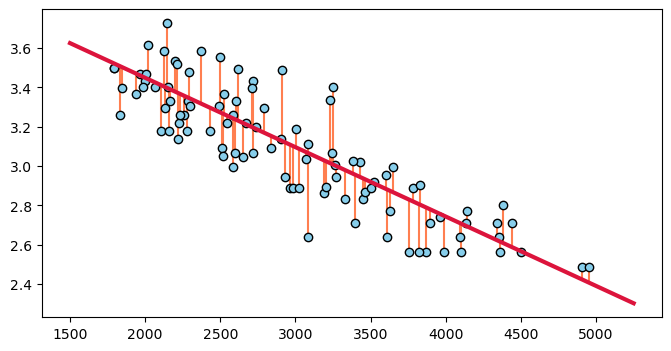

In [29]:
plt.figure(figsize=[8,4])
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5250], [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5250], 
 c='crimson', lw=3)
for i in range(n_test):
 plt.plot([x_test[i], x_test[i]], [pred_y_test[i], y_test[i]], 
 c='coral', zorder=0)
plt.show()


## Part 7: Transforming Test Predictions

In this section, we will calculate estimates for the average MPG for observations in our test set.

We will start by calculating estimates for the average MPG using the values we estimated for the natural log of MPG for each observation in the test set.

In [30]:
# Calculate estimates for average MPG for each observation in the test set
e = 2.718281828
pred_mpg_test = [e ** pred_y for pred_y in pred_y_test]

# Calculating the error in each estimate for the average MPG
error_mpg_test = [mpg_test[i] - pred_mpg_test[i] for i in range(len(mpg_test))]


The above code will calculate the error involved in the MPG estimates for each test observation. This is done by subtracting the estimated MPG from the true MPG.

In [31]:
# Displaying the results for the first 10 observations in the test set
print(f"{'True MPG':>8} {'Pred MPG':>12} {'Error':>9}")
print("-" * 37)
for i in range(10):
    print(f"{mpg_test[i]:>8.1f} {pred_mpg_test[i]:>12.1f} {error_mpg_test[i]:>9.1f}")


True MPG     Pred MPG     Error
-------------------------------------
    14.0         21.4      -7.4
    18.0         16.8       1.2
    20.0         17.6       2.4
    13.0         16.3      -3.3
    20.0         25.6      -5.6
    19.0         22.7      -3.7
    12.0         11.3       0.7
    26.0         28.7      -2.7
    41.5         29.9      11.6
    13.0         15.6      -2.6


The above code will display the true MPG, the estimated MPG, and the estimation error for the first 10 observations in the test set